In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
df = pd.read_csv('FAMID.csv')
df

,m,deg,dmin,F140,F90
0,0.142303,0.002372,0.069590,11.967,5.0305
1,0.320663,0.005344,0.156813,11.698,4.9783
2,0.558235,0.009304,0.272991,11.362,5.7456
3,0.831655,0.013861,0.406701,11.171,5.8375
4,1.100000,0.018333,0.537929,11.031,5.9828
5,1.380000,0.023000,0.674856,10.914,5.9033
6,1.690000,0.028167,0.826454,10.993,6.0145
7,1.940000,0.032333,0.948710,11.144,6.0233
8,2.200000,0.036667,1.075857,11.227,5.4836
9,2.490000,0.041500,1.217675,11.363,6.0409


In [2]:
ratio = df.F90/df.F140
df["ratio"] = ratio
df

,m,deg,dmin,F140,F90,ratio
0,0.142303,0.002372,0.069590,11.967,5.0305,0.420364
1,0.320663,0.005344,0.156813,11.698,4.9783,0.425568
2,0.558235,0.009304,0.272991,11.362,5.7456,0.505686
3,0.831655,0.013861,0.406701,11.171,5.8375,0.522558
4,1.100000,0.018333,0.537929,11.031,5.9828,0.542362
5,1.380000,0.023000,0.674856,10.914,5.9033,0.540892
6,1.690000,0.028167,0.826454,10.993,6.0145,0.547121
7,1.940000,0.032333,0.948710,11.144,6.0233,0.540497
8,2.200000,0.036667,1.075857,11.227,5.4836,0.488430
9,2.490000,0.041500,1.217675,11.363,6.0409,0.531629


In [3]:
Temp = -57/(np.log(df.ratio*0.6**5))
df['T'] = Temp
df

,m,deg,dmin,F140,F90,ratio,T
0,0.142303,0.002372,0.069590,11.967,5.0305,0.420364,16.662956
1,0.320663,0.005344,0.156813,11.698,4.9783,0.425568,16.723107
2,0.558235,0.009304,0.272991,11.362,5.7456,0.505686,17.614512
3,0.831655,0.013861,0.406701,11.171,5.8375,0.522558,17.795002
4,1.100000,0.018333,0.537929,11.031,5.9828,0.542362,18.004081
5,1.380000,0.023000,0.674856,10.914,5.9033,0.540892,17.988660
6,1.690000,0.028167,0.826454,10.993,6.0145,0.547121,18.053894
7,1.940000,0.032333,0.948710,11.144,6.0233,0.540497,17.984510
8,2.200000,0.036667,1.075857,11.227,5.4836,0.488430,17.427527
9,2.490000,0.041500,1.217675,11.363,6.0409,0.531629,17.891123


In [4]:
T=df['T']
c = 3.0E+8 
h = 6.62E-34
kb = 1.38E-23
lam = 1.40E-4
a = np.exp(h*c/(lam*kb*df['T']))
b = 1/(a-1)
planck = 2*h*c*b/lam**3
df['B(V,T)']=planck
df





,m,deg,dmin,F140,F90,ratio,T,"B(V,T)"
0,0.142303,0.002372,0.069590,11.967,5.0305,0.420364,16.662956,3.036266e-16
1,0.320663,0.005344,0.156813,11.698,4.9783,0.425568,16.723107,3.104538e-16
2,0.558235,0.009304,0.272991,11.362,5.7456,0.505686,17.614512,4.240659e-16
3,0.831655,0.013861,0.406701,11.171,5.8375,0.522558,17.795002,4.500050e-16
4,1.100000,0.018333,0.537929,11.031,5.9828,0.542362,18.004081,4.813321e-16
5,1.380000,0.023000,0.674856,10.914,5.9033,0.540892,17.988660,4.789742e-16
6,1.690000,0.028167,0.826454,10.993,6.0145,0.547121,18.053894,4.890006e-16
7,1.940000,0.032333,0.948710,11.144,6.0233,0.540497,17.984510,4.783410e-16
8,2.200000,0.036667,1.075857,11.227,5.4836,0.488430,17.427527,3.982567e-16
9,2.490000,0.041500,1.217675,11.363,6.0409,0.531629,17.891123,4.642354e-16


In [5]:
su = df.F140*5.288*10**-29
D = 1682*3.0857*10**16   
Mass = 0.4*su*D**2/df['B(V,T)']
df['M']=Mass
df

,m,deg,dmin,F140,F90,ratio,T,"B(V,T)",M
0,0.142303,0.002372,0.069590,11.967,5.0305,0.420364,16.662956,3.036266e-16,2.245724e+27
1,0.320663,0.005344,0.156813,11.698,4.9783,0.425568,16.723107,3.104538e-16,2.146968e+27
2,0.558235,0.009304,0.272991,11.362,5.7456,0.505686,17.614512,4.240659e-16,1.526625e+27
3,0.831655,0.013861,0.406701,11.171,5.8375,0.522558,17.795002,4.500050e-16,1.414443e+27
4,1.100000,0.018333,0.537929,11.031,5.9828,0.542362,18.004081,4.813321e-16,1.305813e+27
5,1.380000,0.023000,0.674856,10.914,5.9033,0.540892,17.988660,4.789742e-16,1.298323e+27
6,1.690000,0.028167,0.826454,10.993,6.0145,0.547121,18.053894,4.890006e-16,1.280907e+27
7,1.940000,0.032333,0.948710,11.144,6.0233,0.540497,17.984510,4.783410e-16,1.327438e+27
8,2.200000,0.036667,1.075857,11.227,5.4836,0.488430,17.427527,3.982567e-16,1.606244e+27
9,2.490000,0.041500,1.217675,11.363,6.0409,0.531629,17.891123,4.642354e-16,1.394651e+27


In [6]:
F140=df['F140']*1.25664**-19
B = df['B(V,T)']*10**16
Tau140 = F140/B
Tau140

0     0.051362
1     0.049103
2     0.034915
3     0.032350
4     0.029865
5     0.029694
6     0.029295
7     0.030360
8     0.036736
9     0.031897
10    0.038480
11    0.035433
dtype: float64

In [7]:
av = 1-np.exp(-Tau140/641.3)
df['Av']= av
df

,m,deg,dmin,F140,F90,ratio,T,"B(V,T)",M,Av
0,0.142303,0.002372,0.069590,11.967,5.0305,0.420364,16.662956,3.036266e-16,2.245724e+27,0.000080
1,0.320663,0.005344,0.156813,11.698,4.9783,0.425568,16.723107,3.104538e-16,2.146968e+27,0.000077
2,0.558235,0.009304,0.272991,11.362,5.7456,0.505686,17.614512,4.240659e-16,1.526625e+27,0.000054
3,0.831655,0.013861,0.406701,11.171,5.8375,0.522558,17.795002,4.500050e-16,1.414443e+27,0.000050
4,1.100000,0.018333,0.537929,11.031,5.9828,0.542362,18.004081,4.813321e-16,1.305813e+27,0.000047
5,1.380000,0.023000,0.674856,10.914,5.9033,0.540892,17.988660,4.789742e-16,1.298323e+27,0.000046
6,1.690000,0.028167,0.826454,10.993,6.0145,0.547121,18.053894,4.890006e-16,1.280907e+27,0.000046
7,1.940000,0.032333,0.948710,11.144,6.0233,0.540497,17.984510,4.783410e-16,1.327438e+27,0.000047
8,2.200000,0.036667,1.075857,11.227,5.4836,0.488430,17.427527,3.982567e-16,1.606244e+27,0.000057
9,2.490000,0.041500,1.217675,11.363,6.0409,0.531629,17.891123,4.642354e-16,1.394651e+27,0.000050


In [8]:
df.to_csv("ASHOKAKARICOnt.csv")

0.7748684019297244
0.9075116344236449
0.8922570380374096


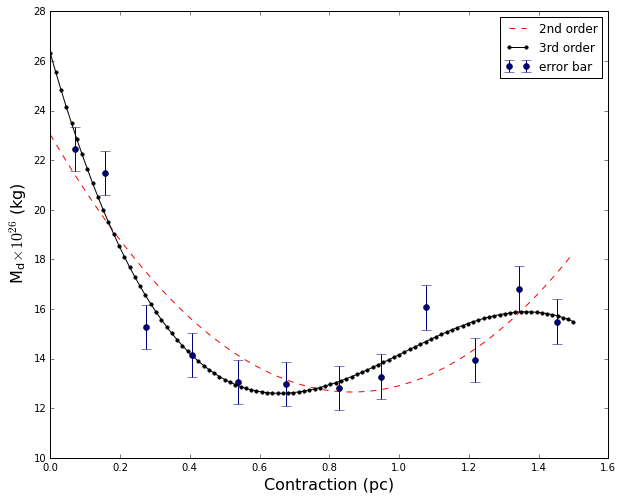

In [18]:
from sklearn.metrics import r2_score
plt.style.use("classic")
%matplotlib inline
mu = np.mean(df['M']*10**-26 )
sigma = np.std(df['M']*10**-26 )
d = df['dmin']
M = df['M']*10**-26
se = sigma/np.sqrt(12)

 
mymodel = np.poly1d(np.polyfit(d, M, 2))
mymodel1 = np.poly1d(np.polyfit(d,M, 3))
mymodel2 = np.poly1d(np.polyfit(d, M, 4))
mymodel3 = np.poly1d(np.polyfit(d, M, 5))
myline = np.linspace(0,1.5,100)
plt.figure(figsize=(10,8))
plt.errorbar(d, M, yerr=se,
           fmt='o',capsize=5,label='error bar',color='navy' )
plt.plot(myline, mymodel(myline),ls='--',c='r',label='2nd order')
plt.plot(myline, mymodel1(myline),marker='.',markersize=7,c='k',label='3rd order')
#plt.plot(myline, mymodel2(myline),c='g',label='4th order')
#lt.plot(myline, mymodel3(myline),c='black',label='5th order')
plt.legend(loc='best')
print(r2_score(M, mymodel(d)))
print(r2_score(M, mymodel1(d)))
#print(r2_score(M, mymodel2(d)))
#print(r2_score(M, mymodel3(d)))
print(se)
plt.xlabel("Contraction (pc)",fontsize=16)
plt.ylabel(r" M$_{\mathregular{d}}$$\times 10^{26}$ (kg)",fontsize=16)
plt.savefig('AmidvsM.png' )

0.7284563010908651
0.8564007651189879
0.8760488597469728
0.8618282318835546
0.13267604549136752


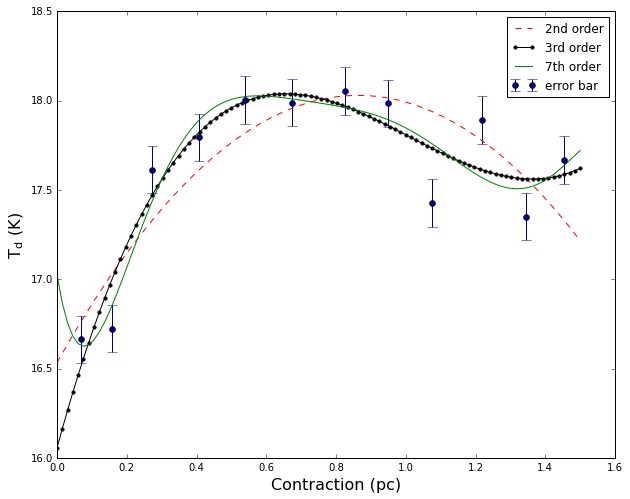

In [14]:
from sklearn.metrics import r2_score
mu = np.mean(df['T'])
sigma = np.std(df['T'])
d = df['dmin']
T = df['T']
se = sigma/np.sqrt(12)

 
mymodel = np.poly1d(np.polyfit(d, T, 2))
mymodel1 = np.poly1d(np.polyfit(d,T, 3))
mymodel2 = np.poly1d(np.polyfit(d, T, 7))
mymodel3 = np.poly1d(np.polyfit(d, T, 5))
myline = np.linspace(0,1.5,100)
plt.figure(figsize=(10,8))
plt.errorbar(d, T, yerr=se,
           fmt='o',capsize=5,label='error bar',color='navy' )
plt.plot(myline, mymodel(myline),ls='--',c='r',label='2nd order')
plt.plot(myline, mymodel1(myline),marker='.',markersize=7,c='k',label='3rd order')
plt.plot(myline, mymodel2(myline),c='g',label='7th order')
#plt.plot(myline, mymodel3(myline),c='black',label='5th order')
plt.legend(loc='best')
print(r2_score(T, mymodel(d)))
print(r2_score(T, mymodel1(d)))
print(r2_score(T, mymodel2(d)))
print(r2_score(T, mymodel3(d)))
print(se)
plt.xlabel("Contraction (pc)",fontsize=16)
plt.ylabel("T$_{\mathregular{d}}$ (K)",fontsize=16)
plt.savefig('AmidvsT.png' )

0.7252000310115967
0.8447959517914687
0.8529531829442804
0.8543046867669246
0.01771303613362746


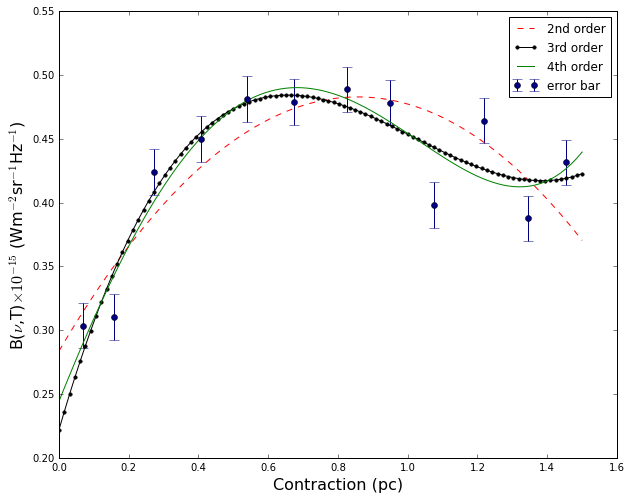

In [15]:
from sklearn.metrics import r2_score
mu = np.mean(df['B(V,T)']*10**15)
sigma = np.std(df['B(V,T)']*10**15)
d = df['dmin']
B = df['B(V,T)']*10**15
se = sigma/np.sqrt(12)

 
mymodel = np.poly1d(np.polyfit(d, B, 2))
mymodel1 = np.poly1d(np.polyfit(d,B, 3))
mymodel2 = np.poly1d(np.polyfit(d, B, 4))
mymodel3 = np.poly1d(np.polyfit(d, B, 5))
myline = np.linspace(0,1.5,100)
plt.figure(figsize=(10,8))
plt.errorbar(d, B, yerr=se,
           fmt='o',capsize=5,label='error bar',color='navy' )
plt.plot(myline, mymodel(myline),ls='--',c='r',label='2nd order')
plt.plot(myline, mymodel1(myline),marker='.',markersize=7,c='k',label='3rd order')
plt.plot(myline, mymodel2(myline),c='g',label='4th order')
#plt.plot(myline, mymodel3(myline),c='black',label='5th order')
plt.legend(loc='best')
print(r2_score(B, mymodel(d)))
print(r2_score(B, mymodel1(d)))
print(r2_score(B, mymodel2(d)))
print(r2_score(B, mymodel3(d)))
print(se)
plt.xlabel("Contraction (pc)",fontsize=16)
plt.ylabel(r"B($\nu$,T)$\times 10^{-15}$ (Wm$^{-2}$sr$^{-1}$Hz$^{-1}$)" ,fontsize=16)
plt.savefig('AmidvsB.png' )

0.9478753041432089
0.983547725583154
0.9846749020794694
0.0902398135987289


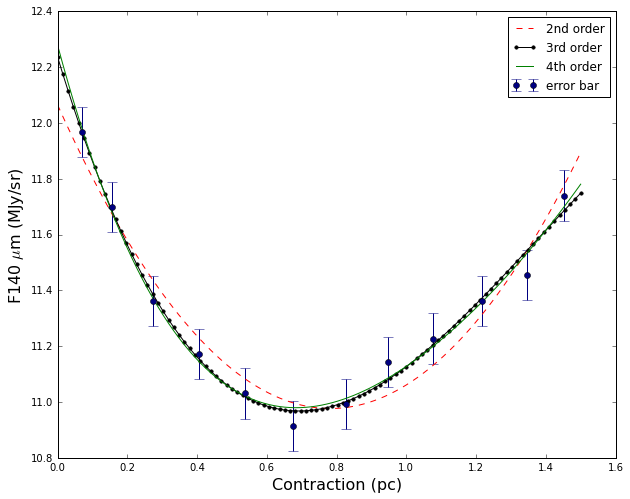

In [16]:
from sklearn.metrics import r2_score
mu = np.mean(df['F140'] )
sigma = np.std(df['F140'] )
d = df['dmin']
F140 = df['F140'] 
se = sigma/np.sqrt(12)

 
mymodel = np.poly1d(np.polyfit(d, F140, 2))
mymodel1 = np.poly1d(np.polyfit(d,F140, 3))
mymodel2 = np.poly1d(np.polyfit(d, F140, 4))
 
myline = np.linspace(0,1.5,100)
plt.figure(figsize=(10,8))
plt.errorbar(d, F140, yerr=se,
           fmt='o',capsize=5,label='error bar' ,color='navy')
plt.plot(myline, mymodel(myline),ls='--',c='r',label='2nd order')
plt.plot(myline, mymodel1(myline),marker='.',markersize=7,c='k',label='3rd order')
plt.plot(myline, mymodel2(myline),c='g',label='4th order')
plt.legend(loc='best')
print(r2_score(F140, mymodel(d)))
print(r2_score(F140, mymodel1(d)))
print(r2_score(F140, mymodel2(d)))
print(se)
plt.xlabel("Contraction (pc)",fontsize=16)
plt.ylabel(r"F140 $\mu$m (MJy/sr)",fontsize=16)
plt.savefig('AmidvsF140.png' )

0.5815229953016771
0.7383874739859217
0.7807632894987075
0.10534716250089862


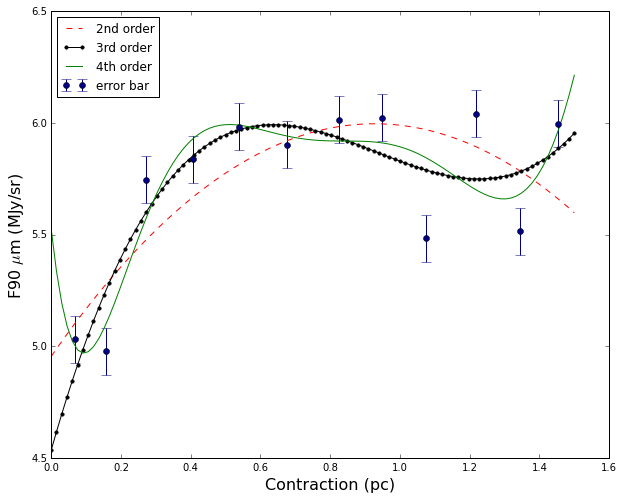

In [17]:
from sklearn.metrics import r2_score
mu = np.mean(df['F90'] )
sigma = np.std(df['F90'] )
d = df['dmin']
F90 = df['F90'] 
se = sigma/np.sqrt(12)

 
mymodel = np.poly1d(np.polyfit(d, F90, 2))
mymodel1 = np.poly1d(np.polyfit(d,F90, 3))
mymodel2 = np.poly1d(np.polyfit(d, F90, 7))
 
myline = np.linspace(0,1.5,100)
plt.figure(figsize=(10,8))
plt.errorbar(d, F90, yerr=se,
           fmt='o',capsize=5,label='error bar',color='navy' )
plt.plot(myline, mymodel(myline),ls='--',c='r',label='2nd order')
plt.plot(myline, mymodel1(myline),marker='.',markersize=7,c='k',label='3rd order')
plt.plot(myline, mymodel2(myline),c='g',label='4th order')
plt.legend(loc='best')
print(r2_score(F90, mymodel(d)))
print(r2_score(F90, mymodel1(d)))
print(r2_score(F90, mymodel2(d)))
print(se)
plt.xlabel("Contraction (pc)",fontsize=16)
plt.ylabel(r"F90 $\mu$m (MJy/sr)",fontsize=16)
plt.savefig('AmidvsF90.png' )